## Principal Component Analysis


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 

**Question**  
How wide and how high is this point cloud?
![image](figures/point_cloud.png)


In [2]:
Image(filename='figures/pca_generation.png', width=500)

FileNotFoundError: [Errno 2] No such file or directory: 'figures/pca_generation.png'

In [ ]:
Image(filename='figures/pca_generated.png', width=500)

In [ ]:
Image(url= "https://i.stack.imgur.com/Q7HIP.gif", width = 800)

# PCA
### Principal component analysis
The **principal components** are a sequence of unit vectors that best fit a collection of points. The process of computing these principal components is called **PCA**. The ordered components represent from the first to the last (n) the main direction of the collection with descending importance. As they are pairwise orthogonal they span an n-dimensional coordinate system. By dropping several of the lesser important coordinates, PCA can be used to **reduce dimensionality** while sparing loss of information, or in other words by  **preserving as much variability as possible**.

### Why do we want to use PCA?

- For visualization. We cannot understand information in more than 3 dimensions.
- Find features with high and low importance
- Find patterns in data
- Understand how features contribute to the pattern in data
- For dimensionality reduction
    - Some algorithms work better with fewer features (e.g. clustering, t-sne, decision trees).
    - Increase performance of certain algorithms (e.g. random forests)
    - To save memory


## Which concepts do we need to understand PCA?

### --> Basic understanding   
(You already know that now. Enough for stakeholders, to test it and apply it, to talk to 90% of colleagues)

- PCA aims to **reduce the dimensions** (number of features) of your data set trying to preserve as much variance as possible by **choosing a new set of the “most informative” dimensions**
- The new variables, the principal components, are **linear combinations** of the original variables.
- With these principal components we map our data into a **new feature space**
- The principal components are **sorted**: the first one explains the most variance, and so on
- We decide how many components to preserve depending on the amount of variance we want to retain

### --> Good understanding 
(This is what we partly aim at in this encounter and what should be known if using PCA regularly.) 

[Here is an excelent article with the right level](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

#### **Know** that calculating PCA involves following steps:
- Calculating the **covariance matrix**: a measure of how variables are associated with each other. :)
- Calculating the **eigenvectors**(directions in which our data are dispersed) and corresponding **eigenvalues** (the relative importance of these different directions) of the covariance matrix :)
- Projection into the **new feature space** formed by the principal components :)


#### Visually* **understand**: 
- Transformation to the new coordinates
- Maximizing (co-) variance
- Eigenvectors and values.  
- This link will help: https://setosa.io/ev/principal-component-analysis/
    
#### Be able to **intepret**: 
- Proportion of variation explained by each principal component
- Biplot
    
_*Visual understansing means you can sketch the concepts to explain them even if you don't know the equations_

### --> Complete understanding 
- Implementation from scratch: best way to understand the math. 
- Example step by step here: https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

----

## PCA on salad Data
We have 800 salad compositions with 7 ingredients.

In [4]:
salads = pd.read_csv('../data/salads.csv')

In [6]:
salads.head()

,Lettuce,Avocado,Tomato,Nuts,Beetroot,Feta,Pepper
0,14.7,16.1,16.0,19.5,20.4,17.6,23.1
1,11.1,16.7,19.3,17.2,28.7,14.6,21.8
2,27.5,22.9,25.9,9.5,30.0,24.3,16.3
3,13.3,16.3,17.6,18.6,25.3,12.4,17.0
4,20.6,28.6,24.8,22.2,14.0,10.8,11.2


Every row stands for a specific salad. Each salad consists of a certain amount (let's assume gramm) of each ingredient. That means we have 800 (more or less) different salads.

In [7]:
salads.shape

(800, 7)

#### Quick look at the features

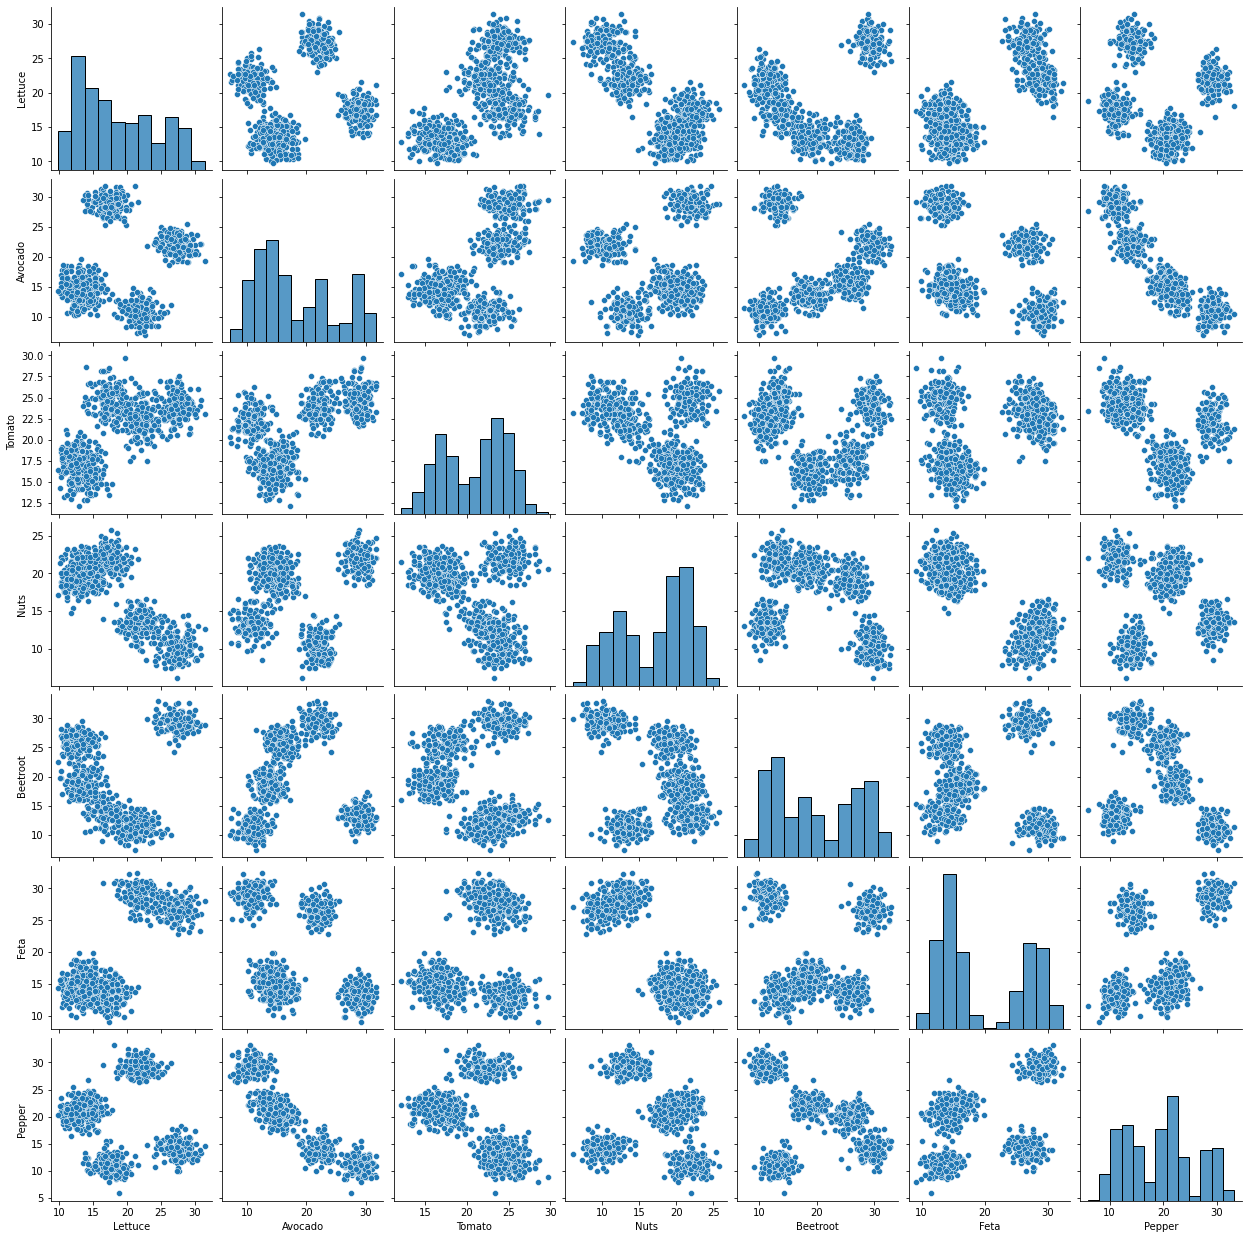

In [8]:
sns.pairplot(salads)

Each dot in the pairplots represents one salad (=> 800 dots per plot). Only two ingredients are shown per pairplot. The main diagonal shows the distribution how many salads consist of how much of the specific ingredient (depends of course on the number/width of columns).

### 1. Scale your features
It is VERY IMPORTANT to scale your input features for the PCA, so that the algorithm doesn't think one variable is more important just because of the units (e.g. mg for pepper and kg for tomatoes).

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X = scaler.fit_transform(salads) # This removes the average of each column and sets the SD to 1.

In [14]:
X.shape

(800, 7)

Apart from the axes' scalings, the pairplots look identical for X or salads.

### 2. PCA with sklearn
Documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).
- n_components: how many components to return after the transformation. 'None' means to keep all.

In [15]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=None) # number of dimentsions here is the number of ingredients, None means takes the maximum of them
#  the way that takes the component if we take less than the maximum is given by the importance of the component, given by : pca.explained_variance_ratio_

In [19]:
pca.fit(X)
W = pca.transform(X)

# fit and transform can also be done in a one liner:
# W = pca.fit_transform(X)

In [20]:
W.shape

(800, 7)

W (just an abritrary name) are the 'salad' coordinates but in the PC-coordinate system. That means there are as well 800 salads which each 7 components. But the components are no longer "Lattuce, Avocado, ..., Pepper" but PC1, PC2, ..., PC7. We will see below what the PC directions consist of.

- If we choose `n_components=None`, we'll get the data in the same _shape_ as before: 800 salads, each 7 components or features (different ones than the original ones).
- Alternatively we could directly set the desired number of components here, e.g. `n_components=3` for the first 3 components.
- BUT these features ARE NOT the same ones as before. => The coordinate system has a different orientation.
- The first axis is for example no longer the 'Lettuce' axis but maybe $2 * Lettuce + 1.7 * Avocado  + ... + ...$ (similar with the other axes)
- If we keep all components --> no information loss but also no dimensionality reduction
- Now we can explore the result:
    - What directions do the principal components have?
    - What is the impact of the different components?
    - How many components should we keep?

### How _important_ are the different components?
## And how dow we decide,  how many components to keep?

By investigating how much of the **variance is explained** be each of the components


Reminder:  
- _Variance_ ($SD^2$) is a measure of how much a sample fluctuates around the expected value.  
- _explained_ means: How much of the total variance can be explained by the model.  
- _model_ means: description of the samples by their coordinate values.  
- _coordinate values_ means: either the original ones or the PCs, either all of them or only few of them

In [22]:
pca.explained_variance_ratio_   # the largest is the number, the more important is the component!!!


array([0.42425322, 0.35309021, 0.17326415, 0.02222217, 0.01211561,
       0.00823136, 0.00682328])

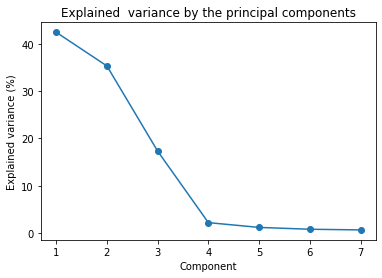

In [23]:
plt.plot(pca.explained_variance_ratio_ * 100, '-o')
plt.xticks(ticks = np.arange(0,7) ,labels = np.arange(1,8))
plt.title('Explained  variance by the principal components')
plt.xlabel('Component')
plt.ylabel('Explained variance (%)')
plt.show()

Use **elbow method** to select the # of components before the _elbow_

Or use a certain threshold of **variance you want to retain**, taking a look at the `cumsum`: 

e.g. Q: "I want to retain at least 90 % of the variance, how many components would I have to keep?"

In [24]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 42.42532219,  77.73434341,  95.06075833,  97.28297546,
        98.49453633,  99.31767235, 100.        ])

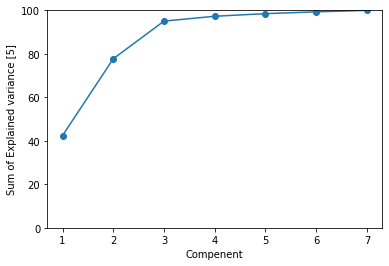

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100), '-o')
plt.ylim(0, 100)
plt.xticks(ticks = np.arange(0,7) ,labels = np.arange(1,8))
plt.xlabel('Compenent')
plt.ylabel('Sum of Explained variance [5]')
plt.show()

Answer: 3

In [26]:
pd.DataFrame(W) # where W are the salad coordinates in the new coordinate system given by PCA

,0,1,2,3,4,5,6
0,-1.259642,-0.948302,-0.454240,-0.359368,-0.052429,0.202179,-0.288872
1,-1.158812,-0.333547,-1.293157,1.000009,-0.252990,0.166213,-0.294010
2,2.685456,1.195564,-1.014683,0.416451,0.041686,-0.287465,-0.341725
3,-1.495756,0.019740,-1.157887,0.179363,-0.194111,-0.226688,0.195599
4,-0.796341,2.533126,1.122826,-0.244247,0.284996,-0.530666,-0.161066
...,...,...,...,...,...,...,...
795,-1.495517,-0.508449,-0.756512,0.917912,0.044352,-0.045662,0.068373
796,-0.740656,2.887888,1.252639,0.142978,-0.161928,-0.454961,0.036174
797,1.741025,-2.173668,1.882785,0.548544,-0.329701,0.156238,-0.129813
798,-1.890509,-1.087979,-0.288064,-0.411599,-0.510118,-0.025077,0.315372


#### Plot in 2D
W contains the salad coordinates but in the PC coordinate system. When we want to plot the 2 most important coordinates, we can access them with W[:,0] and W[:,1].

Text(0, 0.5, 'PC 2 [35.0%]')

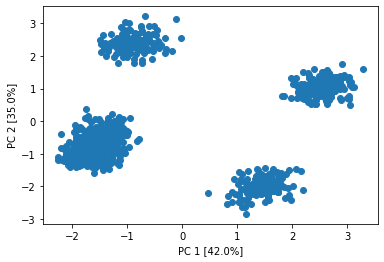

In [27]:
plt.scatter(W[:,0], W[:,1])
plt.xlabel(f'PC 1 [{round(pca.explained_variance_ratio_[0],2)*100}%]')
plt.ylabel(f'PC 2 [{round(pca.explained_variance_ratio_[1],2)*100}%]')

Text(0, 0.5, 'PC 3 [17.0%]')

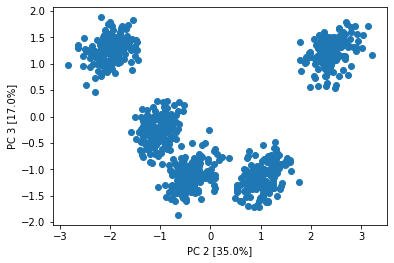

In [28]:
plt.scatter(W[:,1], W[:,2])
plt.xlabel(f'PC 2 [{round(pca.explained_variance_ratio_[1],2)*100}%]')
plt.ylabel(f'PC 3 [{round(pca.explained_variance_ratio_[2],2)*100}%]')

### Out of which original features do the principal components consist?

In [29]:
pca.components_.shape

(7, 7)

- 7 rows for 7 principal components 
- 7 columns for each feature (here ingredient)

In [30]:
pca.components_

array([[ 0.55113846,  0.01086736,  0.35777844, -0.53475309,  0.10122086,
         0.52080288,  0.02609074],
       [ 0.10721133,  0.62080416,  0.37335125,  0.13083549,  0.12013617,
        -0.24126674, -0.61151983],
       [ 0.0105328 ,  0.09242978,  0.39635209,  0.21119991, -0.86608725,
         0.09096913,  0.17681321],
       [-0.49995899, -0.19269262,  0.71681804, -0.12972619,  0.30377393,
        -0.16415291,  0.25105538],
       [ 0.45710413, -0.27597483,  0.22570017,  0.74567377,  0.29460152,
         0.0689575 ,  0.12797885],
       [-0.44955448,  0.31221942, -0.05971633,  0.2818615 ,  0.14755949,
         0.7716558 , -0.01346734],
       [-0.15374909, -0.62862335,  0.084698  ,  0.00341341, -0.15611554,
         0.18741757, -0.71729429]])

In [31]:
print('The first principal component consists of:')
print(pca.components_[0])
print('according to:')
salads.columns

The first principal component consists of:
[ 0.55113846  0.01086736  0.35777844 -0.53475309  0.10122086  0.52080288
  0.02609074]
according to:


Index(['Lettuce', 'Avocado', 'Tomato', 'Nuts', 'Beetroot', 'Feta', 'Pepper'], dtype='object')

<AxesSubplot:>

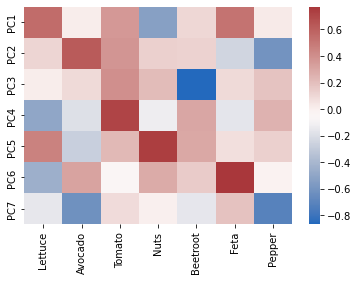

In [32]:
sns.heatmap(pca.components_,
            xticklabels= salads.columns,
            yticklabels=np.array(['PC{}'.format(i) for i in np.arange(1,8)]),
            cmap="vlag")

### Biplot (addendum)
- No inherent biplot function in scikit PCA, but plenty of implementations out there, like this one: https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

- Another options is the pca package (!pip install pca)

In [33]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = 'b', alpha = 0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

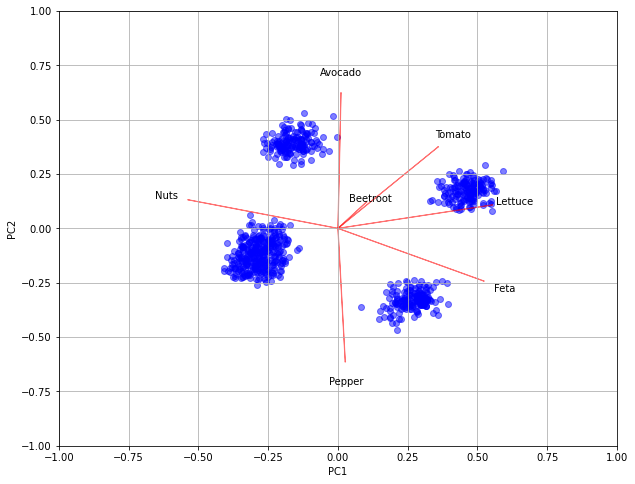

In [34]:
plt.figure(figsize = (10,8))
biplot(W[:,0:2], np.transpose(pca.components_[0:2,:]), labels = salads.columns)

Look [here](https://setosa.io/ev/principal-component-analysis/) for a nice interactive example.